## Tutorial Classification: Pyhton Lab & Book Graphs (Chapter 4 ISL)

Greetings fellow learners,

In this Jupyter notebook, I have included the most important tables and diagrams from Chapter 4: Classification. These visual supports are designed to enhance your reading experience and provide a deeper understanding of the material.

Furthermore, I've undertaken a practical exploration in the lab, focusing on the Smarket Data for the S&P500.It's noteworthy that instead of using the ISLP package as outlined in the book, I opted for the sklearn & statsmodel library.
- **Logistic regression**
- **Linear discriminant analysis (LQA)**
- **Quadratic discriminant analysis (QDA)**
- **K-Nearest Neighbors(KNN)**

Should you have any inquiries or require clarification, feel free to reach out to me at: 597963mr@eur.nl.

Happy coding!
Moritz

In [168]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data  
from ISLP.models import ModelSpec as MS, summarize 
import statsmodels.formula.api as smf  # Importing the formula API of statsmodels

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

In [169]:
df = load_data('default')
df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [170]:
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


#### Figure 4.1 - Default data set

In [171]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib as mpl

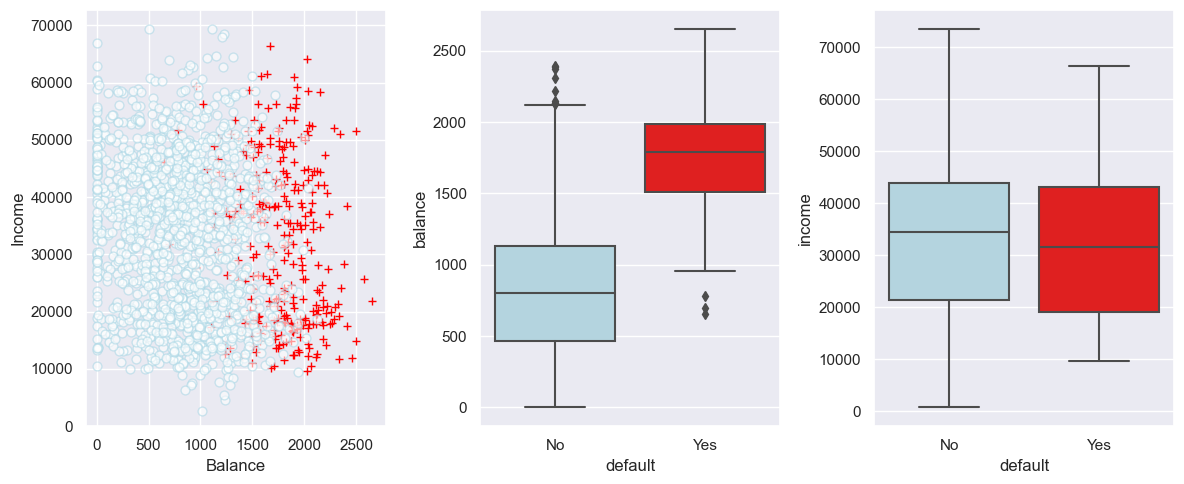

In [172]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Take a fraction of the samples where the target value (default) is 'No'
df_no = df[df.default == 'No'].sample(frac=0.15)

# Take all samples where the target value is 'Yes'
df_yes = df[df.default == 'Yes']

# Concatenate DataFrames
df_ = pd.concat([df_no, df_yes])

# Scatter plot on ax1
scatter_kwargs = {'s': 40, 'linewidths': 1}
ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, c='red', marker='+', **scatter_kwargs)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, marker='o', edgecolors='lightblue',
            facecolors='white', alpha=0.6, **scatter_kwargs)

ax1.set_ylim(bottom=0)
ax1.set_ylabel('Income')
ax1.set_xlim(left=-100)
ax1.set_xlabel('Balance')

# Box plots on ax2 and ax3
c_palette = {'No': 'lightblue', 'Yes': 'red'}
sns.boxplot(x='default', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot(x='default', y='income', data=df, orient='v', ax=ax3, palette=c_palette)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### The Default data set. 
- **Left:** The annual incomes and monthly credit card balances of a number of individuals. The individuals who defaulted on their credit card payments are shown in orange, and those who did not are shown in blue. 
- **Center:** Boxplots of balance as a function of default status. 
- **Right:** Boxplots of income as a function of default status.

### 4.3 Logistic Regression

#### Figure 4.2 - Classification using the Default data

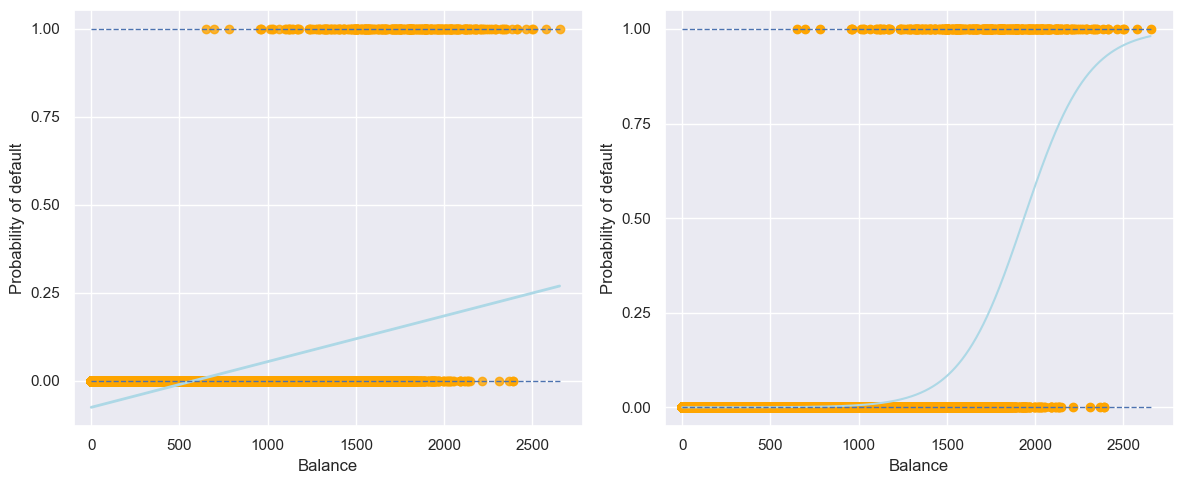

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Extract features and target variable
X_train = df['balance'].values.reshape(-1, 1)
y = df['default2']

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df['balance'].min(), df['balance'].max()).reshape(-1, 1)

# Train logistic regression model
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y)
prob = clf.predict_proba(X_test)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
sns.regplot(x='balance', y='default2', data=df, order=1, ci=None,
            scatter_kws={'color': 'orange'},
            line_kws={'color': 'lightblue', 'lw': 2}, ax=ax1)

# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:, 1], color='lightblue')

# Customize plots
for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

# Show the plot
plt.tight_layout()
plt.show()

- **Left:** Estimated probability of default using linear regression. Some estimated probabilities are negative! The orange ticks indicate the 0/1 values coded for default(No or Yes). 
- **Right**: Predicted probabilities of default using logistic regression. All probabilities lie between 0 and 1.

#### Table 4.1 (page 137)

In [174]:
y = df.default2

#### Using scikit-learn

In [175]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create and train logistic regression model
clf = LogisticRegression(solver='newton-cg')
X_train = df['balance'].values.reshape(-1, 1)
y = df['default2']
clf.fit(X_train, y)

# Display logistic regression model information
print("Logistic Regression Model:")
print(f"Coefficients: {clf.coef_[0][0]:.4f}")
print(f"Intercept: {clf.intercept_[0]:.4f}")
print(f"Classes: {clf.classes_}")
print()

Logistic Regression Model:
Coefficients: 0.0055
Intercept: -10.6513
Classes: [0 1]



For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using balance. A one-unit increase in balance is associated with an increase in the log odds of default by 0.0055 units.

#### Using statsmodels

In [176]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Add constant to the feature matrix
X_train = sm.add_constant(df['balance'])

# Fit logistic regression model
est = smf.glm(formula='default2 ~ balance', data=df, family=sm.families.Binomial()).fit()

# Display summary table
summary_table = est.summary2().tables[1]
print(summary_table)

               Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
Intercept -10.651331  0.361169 -29.491287  3.723661e-191 -11.359208 -9.943453
balance     0.005499  0.000220  24.952404  2.010854e-137   0.005067  0.005931


### Table 4.2 (page 139)

In [177]:
import statsmodels.api as sm
import pandas as pd

# Add constant to the feature matrix
X_train = sm.add_constant(df['student2'])
y = df['default2']

# Fit logistic regression model
logit_model = sm.Logit(y, X_train).fit()

# Display summary table
summary_table = logit_model.summary2().tables[1]
print(summary_table)

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
             Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
const    -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
student2  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320


**TABLE 4.2.** For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using student status. Student status is encoded as a dummy variable, with a value of 1 for a student and a value of 0 for a non-student, and represented by the variable student[Yes] in the table.

## Multiple Logistic Regression

### Table 4.3  (page 144)

In [178]:
import statsmodels.api as sm
import pandas as pd

# Add constant to the feature matrix
features = ['balance', 'income', 'student2']
X_train = sm.add_constant(df[features])
y = df['default2']

# Fit logistic regression model
logit_model = sm.Logit(y, X_train).fit()

# Display summary table
summary_table = logit_model.summary2().tables[1]
print(summary_table)

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
              Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
const    -10.869045  0.492273 -22.079320  4.995499e-108 -11.833882 -9.904209
balance    0.005737  0.000232  24.736506  4.331521e-135   0.005282  0.006191
income     0.000003  0.000008   0.369808   7.115254e-01  -0.000013  0.000019
student2  -0.646776  0.236257  -2.737595   6.189022e-03  -1.109831 -0.183721


**TABLE 4.3.** For the Default data, estimated coefficients of the logistic regression model that predicts the probability of default using balance, income, and student status. Student status is encoded as a dummy variable student[Yes], with a value of 1 for a student and a value of 0 for a non-student. In fitting this model, income was measured in thousands of dollars.

#### Figure 4.3 - Confounding

In [179]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Separate data for students and non-students
students_data = df[df['student'] == 'Yes']
non_students_data = df[df['student'] == 'No']

# Feature matrix for students
X_train_students = students_data['balance'].values.reshape(-1, 1)
y_students = students_data['default2']

# Feature matrix for non-students
X_train_non_students = non_students_data['balance'].values.reshape(-1, 1)
y_non_students = non_students_data['default2']

# Vector with balance values for plotting
X_test = np.arange(df['balance'].min(), df['balance'].max()).reshape(-1, 1)

# Logistic regression models
clf_students = LogisticRegression(solver='newton-cg')
clf_non_students = LogisticRegression(solver='newton-cg')

# Fit models
clf_students.fit(X_train_students, y_students)
clf_non_students.fit(X_train_non_students, y_non_students)

# Predict probabilities
prob_students = clf_students.predict_proba(X_test)
prob_non_students = clf_non_students.predict_proba(X_test)

In [180]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


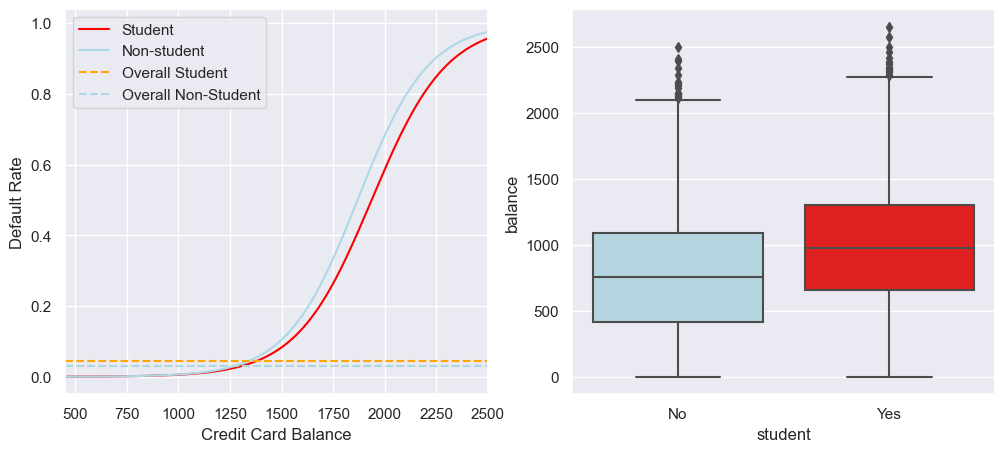

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'prob2' defined from the non-student logistic regression model
prob2 = clf_non_students.predict_proba(X_test)

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='red', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')

# Plot overall default rates
ax1.hlines(127/2817, colors='orange', label='Overall Student', xmin=X_test.min(), xmax=X_test.max(), linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student', xmin=X_test.min(), xmax=X_test.max(), linestyles='dashed')

# Set labels and ticks
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450, 2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot(x='student', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)

# Show the plot
plt.show()

**FIGURE 4.3**. Confounding in the Default data.

- **Left:** Default rates are shown for students (red) and non-students (blue). The solid lines display default rate as a function of balance, while the horizontal broken lines display the overall default rates. 
- **Right**: Boxplots of balance for students (red) and non-students (blue) are shown.

### 4.4 Linear Discriminant Analysis

In [182]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Extract features and target variable
X = df[['balance', 'income', 'student2']].values
y = df['default2'].values

# Initialize and fit Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

# Create a DataFrame for better presentation
df_result = pd.DataFrame({
    'True default status': y,
    'Predicted default status': y_pred
})
df_result.replace({0: 'No', 1: 'Yes'}, inplace=True)

# Display the confusion matrix with totals
confusion_matrix = pd.crosstab(df_result['Predicted default status'], df_result['True default status'], margins=True, margins_name="Total")
print(confusion_matrix)

True default status         No  Yes  Total
Predicted default status                  
No                        9645  254   9899
Yes                         22   79    101
Total                     9667  333  10000


#### Table 4.4
A confusion matrix compares the **LDA predictions** to the true default statuses for the 10,000 training observations in the Default data set. Elements on the diagonal of the matrix represent individuals whose default statuses were correctly predicted, while off-diagonal elements represent individuals that were misclassified. LDA made incorrect predictions for 22 individuals who did not default and for 242 individuals who did default.

In [15]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



#### Table 4.5

Instead of using the probability of **50%** as decision boundary, we say that a probability of default of **20%** is to be classified as 'Yes'.



In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Set decision probability threshold
decision_prob = 0.2

# Fit Linear Discriminant Analysis and predict probabilities
lda = LinearDiscriminantAnalysis()
y_prob = lda.fit(X, y).predict_proba(X)

# Create a DataFrame for better presentation
df_result = pd.DataFrame({
    'True default status': y,
    'Predicted default status': y_prob[:, 1] > decision_prob
})
df_result.replace({0: 'No', 1: 'Yes', 'True': 'Yes', 'False': 'No'}, inplace=True)

# Display the confusion matrix with totals
confusion_matrix = pd.crosstab(df_result['Predicted default status'], df_result['True default status'], margins=True, margins_name="Total")
print(confusion_matrix)

True default status         No  Yes  Total
Predicted default status                  
False                     9435  140   9575
True                       232  193    425
Total                     9667  333  10000


### TABLE 4.5.
A confusion matrix compares the **LDA** predictions to the true default statuses for the 10,000 training observations in the Default data set, using a modified threshold value that predicts default for any individuals whose posterior default probability exceeds 20 %.

## 

# 4.7 Lab: Logistic Regression, LDA, QDA, and KNN

In this exercise, we will demonstrate how to perform logistic regression, linear and quadratic discriminant analysis, and k-nearest neighbors to predict categorical responses in Python (using scikit-learn). We will import the various Python packages that we will use in this lab before we begin. This includes some of the classification metrics from scikit-learn. 

https://scikit-learn.org/stable/

### The Stock market data
In the following we will examine the Smarket data, which is part of the ISLP library. This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005.

- **Lag1** through **Lag5**: the percentage returns for each of the five previous trading days
- **Volume**  the number of shares traded on the previous day, in billions
- **Today**: the percentage return on the date in question
- **Direction**: whether the market was Up (positive percentage return) or Down (negative percentage return) on this date.

## 1. Import libraries

In [184]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import scikit-learn modules for various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Import StatsModels API for statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2. Loading the dataset

In [185]:
Smarket = load_data('Smarket')
Smarket.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [186]:
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

## 3. Data Preprocessing

In [187]:
# Check for missing values
Smarket.isna().any()

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [188]:
# Displaying the dimensions (number of rows and columns)
Smarket.shape

(1250, 9)

Before we continue, we create a scatter plot matrix for all variables in the set. In order to visualize the difference between "Up" and "Down" days, we will use the Direction column to determine the hue.

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

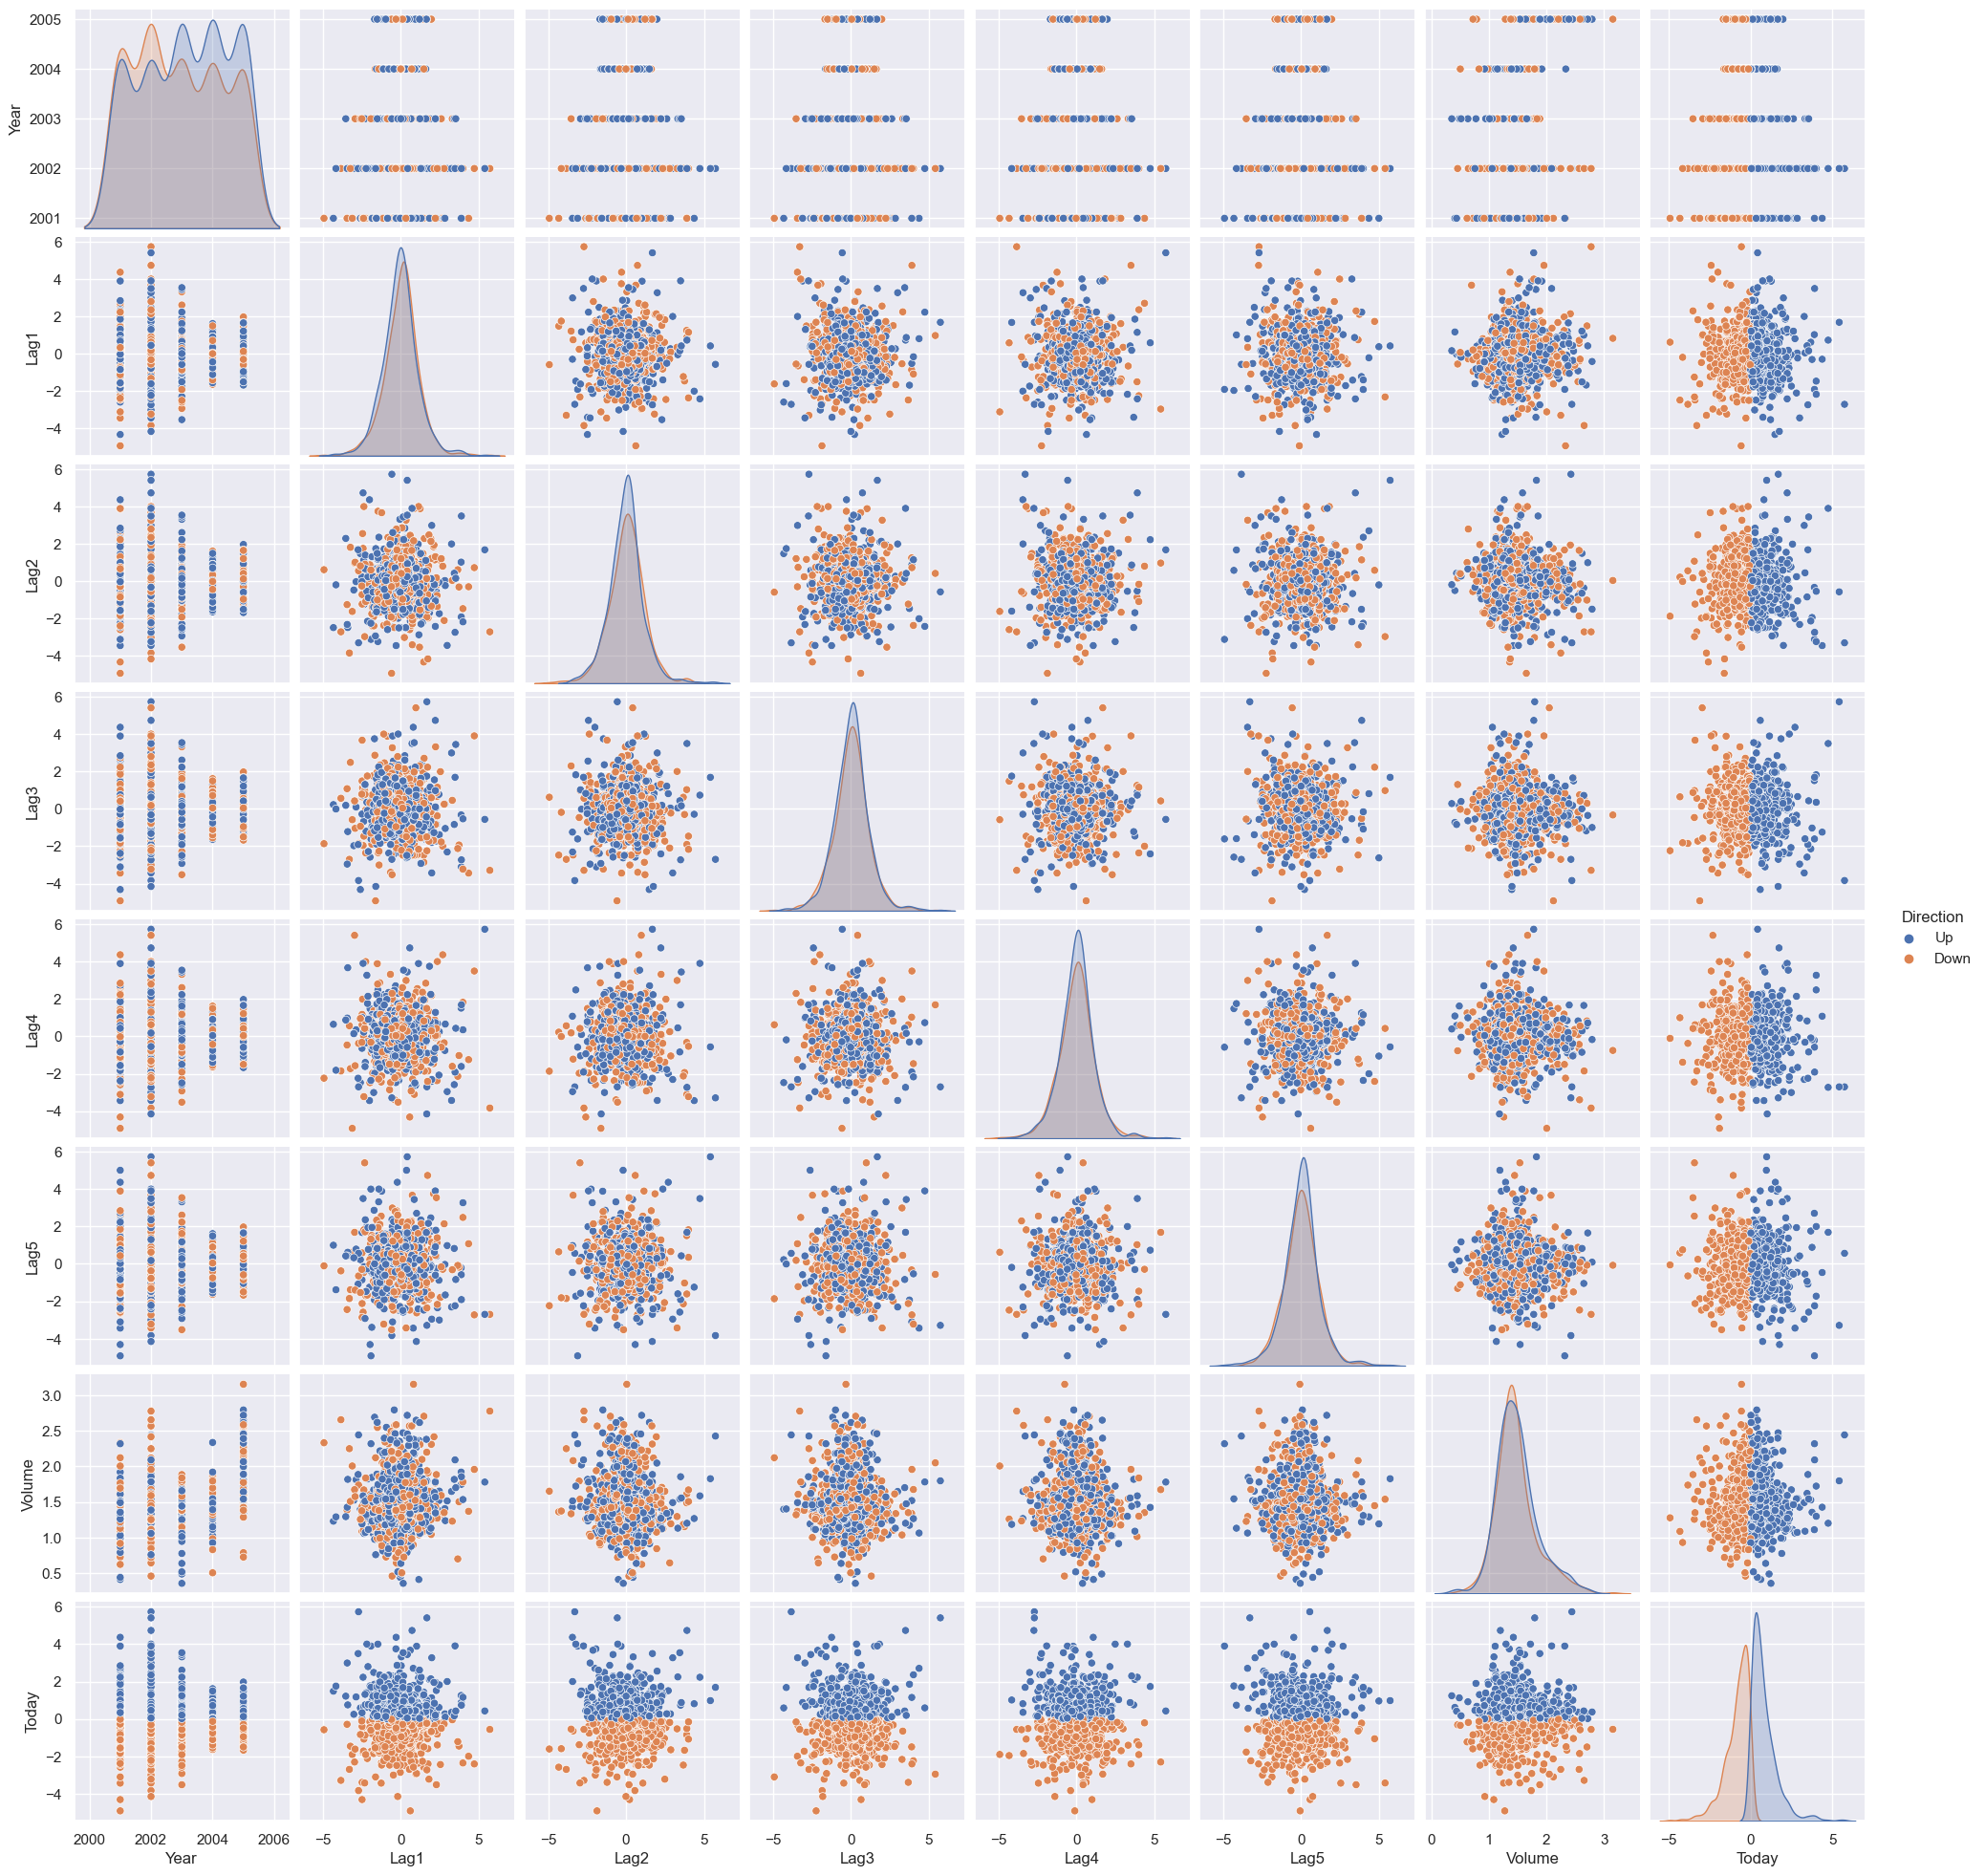

In [189]:
# Create a pair plot using Seaborn to visualize relationships between numerical variables in 'Smarket'
# 'hue="Direction"' adds color differentiation based on the 'Direction' column
sns.pairplot(Smarket, hue="Direction")

In addition, a matrix of all pairwise correlations between the variables in the data set is generated. 

In [190]:
# Using 'numeric_only=True' ensures only numeric columns are considered in the correlation computation
Smarket.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


If we look at the last line, we can see that the correlations between the lag variables and today's returns are close to zero, indicating that there appears to be little correlation between today's returns and the previous days' returns. The only notable correlation is between year and volume with a value of 0.539. Based on the data, it can be seen that volume is increasing over time. In other words, the average number of shares traded daily has increased from 2001 to 2005.

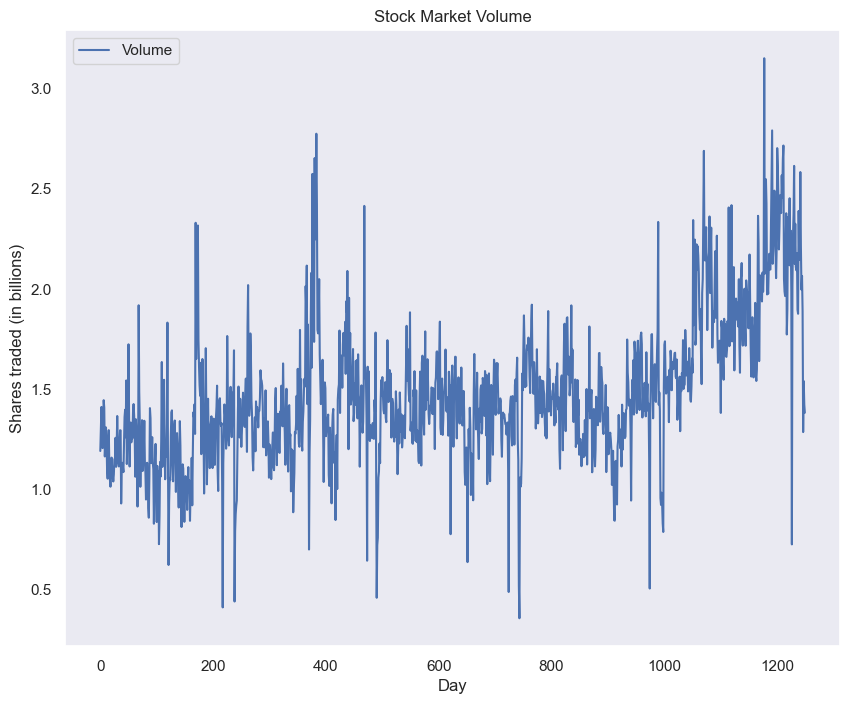

In [195]:
import matplotlib.pyplot as plt

# Create a subplot with a specified size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the 'Volume' column as a line chart
Smarket['Volume'].plot(ax=ax, label='Volume')

# Set labels and title for the plot
ax.set(xlabel="Day", ylabel="Shares traded (in billions)", title="Stock Market Volume")

# Add a legend, display a grid, and show the plot
ax.legend()
ax.grid()
plt.show()

### Logistic Regression

We start by fitting a logistic regression model to predict the direction from Lag1 trough lag5 and Volume using the Logit class from scikit-learn.

In [196]:
# Encode the binary response variable 'Direction' numerically (1 for 'Up', 0 for 'Down')
endog = (Smarket["Direction"] == "Up").astype("int64")

# Extract predictor variables, add a constant term, and exclude unnecessary columns
exog = sm.add_constant(Smarket.drop(columns=["Direction", "Year", "Today"]))

# Create a logistic regression model using Logit class
logit_mod = sm.Logit(endog, exog)

# Fit the logistic regression model to the data
logit_res = logit_mod.fit()

# Display the summary statistics of the logistic regression model
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                0.002074
Time:                        20:51:15   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

Although Lag1 has the smallest p-value of all coefficient estimates, it still has a value of 0.145, which is still relatively high. Although the negative coefficient for Lag1 suggests that if the market had a positive return yesterday, it is less likely to rise today, there is no clear indication of a real relationship between Lag1 and direction.

In [197]:
# Accessing the parameter estimates (coefficients) from the logistic regression results
logit_params = logit_res.params

In [198]:
pd.DataFrame({"Estimate":logit_res.params, "Std. Error":logit_res.bse, "z value":logit_res.tvalues,
             "Pr(>|z|)":logit_res.pvalues})

,Estimate,Std. Error,z value,Pr(>|z|)
const,-0.126000,0.240737,-0.523394,0.600700
Lag1,-0.073074,0.050168,-1.456583,0.145232
Lag2,-0.042301,0.050086,-0.844568,0.398352
Lag3,0.011085,0.049939,0.221974,0.824334
Lag4,0.009359,0.049974,0.187275,0.851445
Lag5,0.010313,0.049512,0.208296,0.834998
Volume,0.135441,0.158361,0.855266,0.392404


In [199]:
# Prepare data for scikit-learn logistic regression
X = Smarket.drop(columns = ["Direction", "Year", "Today"])
y = Smarket["Direction"]

# By default scikit-learn uses an l2 regularization penalty, which we don't want for
# vanilla logistic regression as described in the book
log_reg = LogisticRegression(penalty = "none", solver = "lbfgs")
log_reg.fit(X, y)

# Extract and organize coefficients (parameters) for interpretation
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = X.columns.insert(0, "intercept"))

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,Coef. Est.
intercept,-0.126008
Lag1,-0.073073
Lag2,-0.042301
Lag3,0.011086
Lag4,0.009360
Lag5,0.010313
Volume,0.135446


In [200]:
# Generating predictions using the logistic regression model (Logit)
logit_probs = logit_res.predict()

# Displaying the first 10 predicted probabilities
logit_probs[0:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

In [201]:
# Generating predicted probabilities using scikit-learn logistic regression
log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns = log_reg.classes_).head(10)

,Down,Up
0,0.492916,0.507084
1,0.518533,0.481467
2,0.518861,0.481139
3,0.484778,0.515222
4,0.489219,0.510781
5,0.493043,0.506957
6,0.507349,0.492651
7,0.490771,0.509229
8,0.482387,0.517613
9,0.511162,0.488838


While we can convert the predicted probabilities into class labels Up or Down, the predict() function for LogisticRegression in scikit-learn actually does this automatically by assigning each prediction to the class for which it has the highest probability (which in the case of binary classification is the class with probability greater than 0.5).

In [202]:
# Generating predictions and combining with predicted probabilities using scikit-learn logistic regression
log_reg_pred = log_reg.predict(X)
pd.DataFrame(np.hstack((log_reg_probs, log_reg_pred.reshape(-1,1))), 
             columns = np.concatenate((log_reg.classes_, ["Prediction"]))).head(10)

,Down,Up,Prediction
0,0.492916,0.507084,Up
1,0.518533,0.481467,Down
2,0.518861,0.481139,Down
3,0.484778,0.515222,Up
4,0.489219,0.510781,Up
5,0.493043,0.506957,Up
6,0.507349,0.492651,Down
7,0.490771,0.509229,Up
8,0.482387,0.517613,Up
9,0.511162,0.488838,Down


In addition, both StatsModels and scikit-learn have convenient methods for generating confusion matrices in order to determine how many observations were correctly or incorrectly labeled.

In [203]:
# Creating a DataFrame to display the confusion matrix for scikit-learn logistic regression predictions
pd.DataFrame(confusion_matrix(y, log_reg_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,145,457
ActualUp,141,507


The diagonal of the confusion matrix represents correct predictions, while the off-diagonal represents incorrect predictions. Thus, the model correctly predicted that the market would go up on 507 days and go down on 145 days, for a total of 652 correct predictions. This means that logistic regression correctly predicted the movement of the market  652/1250=52.16%  of the time.
Upon initial examination, it seems that the logistic regression model exhibits performance slightly superior to random guessing. Nevertheless, this assessment can be deceptive due to the fact that both training and testing were conducted on the identical set of 1,250 observations. In essence, the training error rate stands at 47.84%, calculated as 100% minus the accuracy of 52.16%.

In StatsModels, another way we can compute this is to use the mean() function.

In [204]:
# Generating binary predictions based on logistic regression probabilities
logit_preds = pd.Series(logit_probs).apply(lambda x: "Up" if (x > 0.5) else "Down")
(logit_preds == Smarket["Direction"].values).mean()

0.5216

In [205]:
# Calculating the accuracy score of scikit-learn logistic regression
log_reg.score(X, y)

0.5216

For a better assessment of the accuracy of the logistic regression model in this situation, we can fit the model with a subset of the data and then examine how well it predicts the held-out data. This leads to a more realistic error rate, as in practice we are not interested in the performance of our model for the data we used to fit the model, but for days in the future for which the market movements are unknown.
To implement this strategy, we first create a Boolean vector corresponding to the observations from 2001 to 2004. We then use this vector to create a data set with observations from 2005.

In [206]:
# Creating a boolean mask for training data based on the condition 'Year < 2005'
train_mask = (Smarket["Year"] < 2005)

In [207]:
# Recall that to to element-wise logical operators for boolean indexing in Pandas, we need to use
# | for or, & for and, ~ for not
Smarket_test = Smarket[~train_mask]
Smarket_test.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [208]:
Smarket_test.shape

(252, 9)

The elements of the vector that correspond to observations that occurred before 2005 are set to True, whereas those that correspond to observations in 2005 are set to False. Hence train is a boolean array, since its elements are True and False. 

### 4. Training Model & Splitting the Data

We now fit a logistic regression model using only the subset of the observations that correspond to dates before 2005. We then obtain predicted probabilities of the stock market going up for each of the days in our test set — that is, for the days in 2005.

In [209]:
# Using LogisticRegression from scikit-learn
# First separate out the training and test sets
X_train = Smarket[train_mask].drop(columns = ["Direction", "Year", "Today"])
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket[~train_mask].drop(columns = ["Direction", "Year", "Today"])
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the model using the training set
log_reg = LogisticRegression(penalty = "none", solver = "lbfgs")
log_reg.fit(X_train, y_train)

#Test the model using the held-out test set
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, log_reg_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,PredDown,PredUp
ActualDown,77,34
ActualUp,97,44


In [210]:
log_reg.score(X_test, y_test)

0.4801587301587302

In [211]:
1 - log_reg.score(X_test, y_test)

0.5198412698412698

#### The test accuracy is about 48% while the error rate is about 52%. Disappointing :( (Worse than random guessing)

At this point, we see that the error rate on separate training and test sets is around 52%, which is worse than random guessing! This suggests that we should experiment more to see if we can improve our model. One possibility is to remove the variables that were found to be unhelpful in predicting direction and recalculate the logistic regression model. As we recall, none of the p-values for the predictors were particularly small, not even the smallest one corresponding to lag1. Since using predictors that are unrelated to the response increases the variance of a model without a corresponding reduction in bias, they therefore tend to have a negative effect on the test error rate. 

In the next part we try to readjust the logistic regression by using only Lag1 and Lag2, which seemed to have the highest predictive power in the original logistic regression model.

In [212]:
# Using LogisticRegression from scikit-learn
# Separate the dataset into training and test sets
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the model using the training set
log_reg = LogisticRegression(penalty = "none", solver = "lbfgs")
log_reg.fit(X_train, y_train)

#Test the model using the held-out test set
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, log_reg_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,PredDown,PredUp
ActualDown,35,76
ActualUp,35,106


In [213]:
log_reg.score(X_test, y_test)

0.5595238095238095

In [214]:
(Smarket_2005["Direction"] == "Up").mean()

0.5595238095238095

Thus, in terms of the overall error rate, logistic regression is no better than naively predicting that the market would increase every day. However, when we examine the confusion matrix a little more closely we can see that on days when logistic regression predicts an increase in the maket, it has a slightly better accuracy rate of  106/(106+76)=0.582 . This suggests a possible strategy of buying on days when the model predicts an increasing market, and avoiding trades when the model predicts a decreasing market. Without further investigation, though, we do not know if this small improvement is real or just due to random chance.

Lastly, if we wish to predict the returns associated with particular values of Lag1 and Lag2, such as on a day when Lag1 = 1.2 and Lag2 = 1.1, or on a day when Lag1 = 1.5 and Lag2 = -0.8, we can do this using the predict() function in StatsModels or predict_proba() function in scikit-learn if we want the raw probabilities.

In [215]:
# Creating a DataFrame 'df' with specified values for columns 'Lag1' and 'Lag2'
df = pd.DataFrame({"Lag1": [1.2, 1.5], "Lag2": [1.1, -0.8]})

In [216]:
pd.DataFrame(log_reg.predict_proba(df), columns = log_reg.classes_)

,Down,Up
0,0.520854,0.479146
1,0.503889,0.496111


In [217]:
# Using scikit-learn to directly computed predicted class labels
log_reg.predict(df)

array(['Down', 'Down'], dtype=object)

### LinearDiscriminantAnalysis (LDA)

Now we will perform **LDA** on the Smarket data using the LinearDiscriminantAnalysis class from scikit-learn. Just as we did with the second attempt at using logistic regression, we'll only use the observations from before 2005 to fit the model, and we'll only use Lag1 and Lag2 as the predictors.

### The method described in the ISL book with LDA(), seem not to work anymore!

In [218]:
# Separating the dataset into training and test sets for Linear Discriminant Analysis (LDA)
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Initializing and fitting the LDA model using the training set
lda_clf = LinearDiscriminantAnalysis(store_covariance=True)
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [219]:
# Prior probabilities for the classes
pd.Series(lda_clf.priors_, index = lda_clf.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [220]:
# Group means for each predictor within each class
pd.DataFrame(lda_clf.means_, index = lda_clf.classes_, columns = X_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [221]:
# Coefficients for linear discriminants
pd.Series(lda_clf.coef_.flatten(), index = X_train.columns)

Lag1   -0.055441
Lag2   -0.044345
dtype: float64

In [222]:
# Scalings for linear discriminants
pd.Series(lda_clf.scalings_.flatten(), index = X_train.columns)

Lag1   -0.642019
Lag2   -0.513529
dtype: float64

In [223]:
# Computing the coefficients for Lag1 and Lag2 using the log-ratio formula above
# These coefficients match with the coefficient values obtained when using the least-squares solver
np.linalg.inv(lda_clf.covariance_) @ (lda_clf.means_[1] - lda_clf.means_[0])

array([-0.05555211, -0.04443425])

In [224]:
# Relating the coefficients with the scaling values
# These are the coefficients when using the singular value decomposition
# or eigenvalue decomposition solver
orig_coefs = np.dot(lda_clf.means_, lda_clf.scalings_).dot(lda_clf.scalings_.T)
log_ratio_coefs = orig_coefs[1, :] - orig_coefs[0, :]
log_ratio_coefs

array([-0.05544078, -0.0443452 ])

/var/folders/9m/wyctr7ld6vg0x1kjlmlh42hh0000gn/T/ipykernel_28619/1518602540.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lda_scores, kde = False, axlabel = "log-ratio score")


<Axes: xlabel='log-ratio score'>

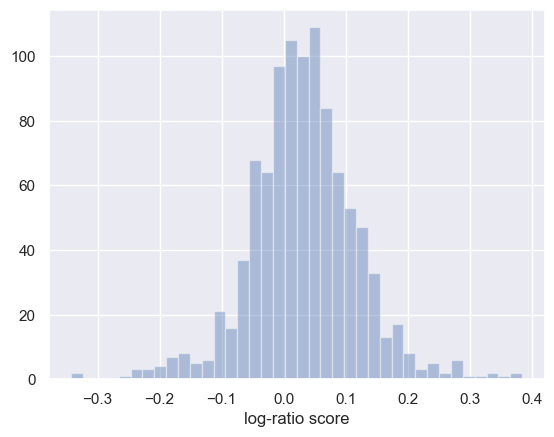

In [225]:
lda_scores = lda_clf.decision_function(X_train)
sns.distplot(lda_scores, kde = False, axlabel = "log-ratio score")

In [226]:
lda_pred = lda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, lda_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,35,76
ActualUp,35,106


As we observed in our comparison of classification methods before, the LDA and logistic regression predictions are almost identical.

We can also estimate the probability of each class for each point in a training set. Applying a 50% threshold to the posterior probabilities of being in class one allows us to recreate the predictions contained in lda_pred.

In [227]:
# Calculating the accuracy score of Linear Discriminant Analysis (LDA) on the test set
lda_clf.score(X_test, y_test)

0.5595238095238095

In [228]:
lda_pred_probs = pd.DataFrame(lda_clf.predict_proba(X_test), columns = lda_clf.classes_)
lda_pred_probs.head()

,Down,Up
0,0.490179,0.509821
1,0.479218,0.520782
2,0.466818,0.533182
3,0.474001,0.525999
4,0.492788,0.507212


In [229]:
pd.Series(lda_pred).head()

0    Up
1    Up
2    Up
3    Up
4    Up
dtype: object

If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day — say, if the posterior probability is at least **90%.**

In [230]:
(lda_pred_probs["Down"] > 0.9).sum()

0

No days in 2005 meet that threshold! In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.

In [231]:
lda_pred_probs["Down"].max()

0.5202349505356155

In [232]:
lda_pred_probs.max()

Down    0.520235
Up      0.542213
dtype: float64

#### Quadratic Discriminant Analysis

Next, let's fit a quadratic discriminant analysis (QDA) model to the Smarket data. QDA is also part of sklearn.discriminant_analysis as the QuadraticDiscriminantAnalysis() class.

In [233]:
# First separate out the training and test sets
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Fit the QDA model using the training set
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [234]:
# Prior probabilities for the classes
pd.Series(qda_clf.priors_, index = qda_clf.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [235]:
# Group means for each predictor within each class
pd.DataFrame(qda_clf.means_, index = qda_clf.classes_, columns = X_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [236]:
qda_pred = qda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, qda_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,30,81
ActualUp,20,121


In [237]:
qda_clf.score(X_test, y_test)

0.5992063492063492

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression.

In [238]:
qda_pred_probs = pd.DataFrame(qda_clf.predict_proba(X_test), columns = lda_clf.classes_)
(qda_pred_probs["Down"] > 0.9).sum()

0

In [239]:
qda_pred_probs.max()

Down    0.522407
Up      0.546185
dtype: float64

### K-Nearest Neighbors

The last method of working with the Smarket data we'll use is K-nearest neighbors. To do this, we'll use the KNeighborsClassifier class from the sklearn.neighbors module.

https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [240]:
# First separate out the training and test sets
X_train = Smarket.loc[train_mask, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train_mask, "Direction"]
X_test = Smarket.loc[~train_mask, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train_mask, "Direction"]

# Set NumPy random seed for consistency and reproducibility for our results
np.random.seed(1)

# Fit the KNN model using the training set and K = 1
knn_1_clf = KNeighborsClassifier(n_neighbors = 1)
knn_1_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [241]:
knn_1_pred = knn_1_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_1_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,43,68
ActualUp,58,83


In [242]:
knn_1_clf.score(X_test, y_test)

0.5

Using  𝐾=1 , our results aren't very good, since only  (43+83)/252=50%  of the observations are correctly predicted. Of course, using  𝐾=1  is a very flexible fit, so perhaps it was too much flexibility. Let's try again using  𝐾=3 .

In [243]:
# Fit the KNN model using the training set and K = 3
knn_3_clf = KNeighborsClassifier(n_neighbors = 3)
knn_3_clf.fit(X_train, y_train)
knn_3_pred = knn_3_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_3_pred), 
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,48,63
ActualUp,55,86


In [244]:
knn_3_clf.score(X_test, y_test)

0.5317460317460317

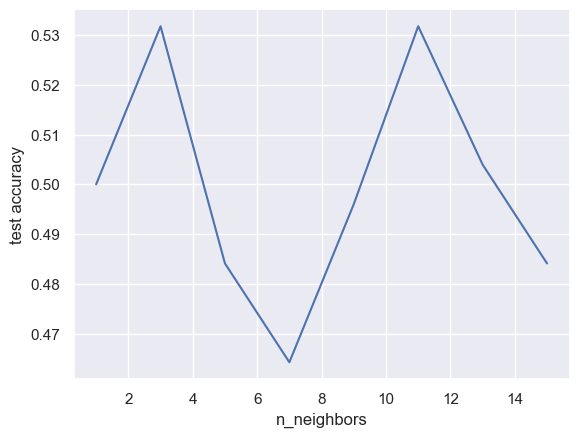

In [245]:
knn_scores = []
for k in range(1, 16, 2):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train, y_train)
    knn_scores.append(knn_clf.score(X_test, y_test))
fig = plt.figure()
ax = plt.axes()
ax.plot(range(1, 16, 2), knn_scores)
ax.set(xlabel = "n_neighbors", ylabel = "test accuracy");

Overall results improved slightly to around 53.2% test accuracy, although a further increase in 𝐾 did not provide any additional improvements. It appears for these data that QDA provides the best results of the methods investigated so far.